In [1]:
from bsread import source, SUB, PULL, PUSH, PUB
import matplotlib.pyplot as plt
import numpy as np

In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /sf/photo/miniconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [88]:
#from cam_server.utils import get_host_port_from_stream_address

port=9003
host = "sf-daqsync-03.psi.ch"
mode = SUB
num_shots = 10000
x_corr = []
x_corr_amp = []
signal = []
raw_wf = []
raw_wf_savgol = []
dark_wf = []
avg_dark_wf = []
att = []
edge_pos = []
pulse_id = []
at_odd = []
at_even = []

with source(host=host, port=port, mode=SUB) as stream:
    for i in range(0,num_shots):
        message = stream.receive()
        if i == 0:
            print(message.data.data.keys())
        x_corr.append(message.data.data['SAROP21-ATT01:xcorr'].value)
        x_corr_amp.append(message.data.data['SAROP21-ATT01:xcorr_ampl'].value) 
        signal.append(message.data.data['SAROP21-ATT01:signal'].value)
        att.append(message.data.data['SAROP21-ATT01:arrival_time'].value)
        edge_pos.append(message.data.data['SAROP21-ATT01:edge_pos'].value)
        raw_wf.append(message.data.data['SAROP21-ATT01:raw_wf'].value)
        raw_wf_savgol.append(message.data.data['SAROP21-ATT01:raw_wf_savgol'].value)
        avg_dark_wf.append(message.data.data['SAROP21-ATT01:avg_dark_wf'].value)
        pulse_id.append(message.data.data['SAROP21-ATT01:pulse_id'].value)
        at_odd.append(message.data.data['SAROP21-ATT01:arrival_time_odd'].value)
        at_even.append(message.data.data['SAROP21-ATT01:arrival_time_even'].value)
        
        
x_corr = np.asarray(x_corr)        

odict_keys(['SAROP21-ATT01:edge_pos', 'SAROP21-ATT01:xcorr', 'SAROP21-ATT01:xcorr_ampl', 'SAROP21-ATT01:signal', 'SAROP21-ATT01:arrival_time', 'SAROP21-ATT01:arrival_time_even', 'SAROP21-ATT01:arrival_time_odd', 'SAROP21-ATT01:pulse_id', 'SAROP21-ATT01:raw_wf', 'SAROP21-ATT01:raw_wf_savgol', 'SAROP21-ATT01:dark_wf', 'SAROP21-ATT01:dark_wf_savgol', 'SAROP21-ATT01:avg_dark_wf', 'SAROP21-ATT01:avg_dark_wf_savgol'])


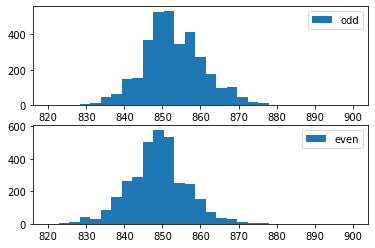

In [192]:
plt.figure()
plt.subplot(211)
plt.hist(at_odd, np.linspace(820,900,30),label = 'odd')
plt.legend()            
plt.subplot(212)
plt.hist(at_even, np.linspace(820,900,30), label = 'even')
plt.legend()

In [93]:
index_even = np.asarray(pulse_id) %2 == 0

In [135]:
index_even

array([ True, False,  True, ...,  True, False,  True])

In [139]:
np.asarray(signal)[index_even]

array([array([0.99852156, 0.99850649, 0.99849225, ..., 0.98560144, 0.98551966,
       0.98543637]),
       array([0.99915567, 0.99914202, 0.99912906, ..., 0.99088219, 0.9908038 ,
       0.99072384]),
       nan, ..., nan,
       array([0.99684336, 0.99681347, 0.99678579, ..., 0.98195292, 0.98203408,
       0.98211716]),
       array([0.99803013, 0.99793441, 0.99784181, ..., 0.98354842, 0.98355933,
       0.98357057])], dtype=object)

In [186]:
signal_good_even= []
for val in np.asarray(signal)[index_even]:
    if ~np.isnan(np.sum(val)):
        signal_good_even.append(val)
signal_good_even = np.asarray(signal_good_even)

signal_good_odd= []
for val in np.asarray(signal)[~index_even]:
    if ~np.isnan(np.sum(val)):
        signal_good_odd.append(val)
signal_good_odd = np.asarray(signal_good_odd)

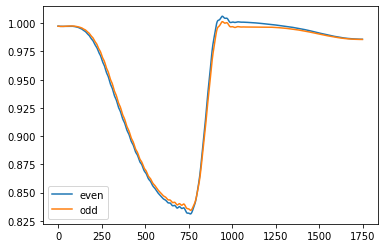

In [189]:
plt.figure()
plt.plot(signal_good_even.mean(axis=0), label= 'even')
plt.plot(signal_good_odd.mean(axis=0), label= 'odd')
plt.legend()

In [176]:
for val in signal_test:
    if np.isnan(val.all()):
        print(val)

In [132]:
for val in signal:
    print(val[0])

0.9985215620863075


IndexError: invalid index to scalar variable.

In [103]:
index_data = signal  != 'nan'

In [104]:
index_data

True

In [137]:
signal_test = np.asarray(signal)

In [138]:
signal_test[index_even].shape

(5002,)

In [70]:
signal[index_even]

TypeError: only integer scalar arrays can be converted to a scalar index

In [67]:
signal_even = signal[index_even]

TypeError: only integer scalar arrays can be converted to a scalar index

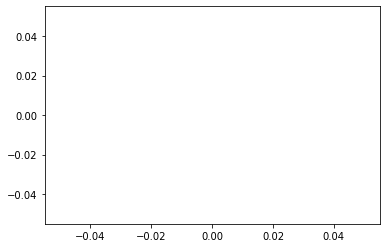

In [56]:
plt.figure()
plt.plot(np.asarray(signal).mean(axis=0))

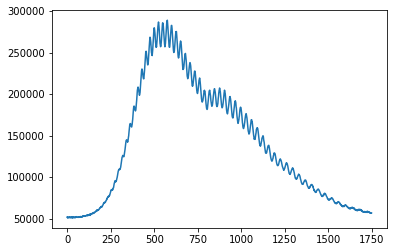

In [24]:
plt.figure()
plt.plot(np.asarray(raw_wf).mean(axis=0))

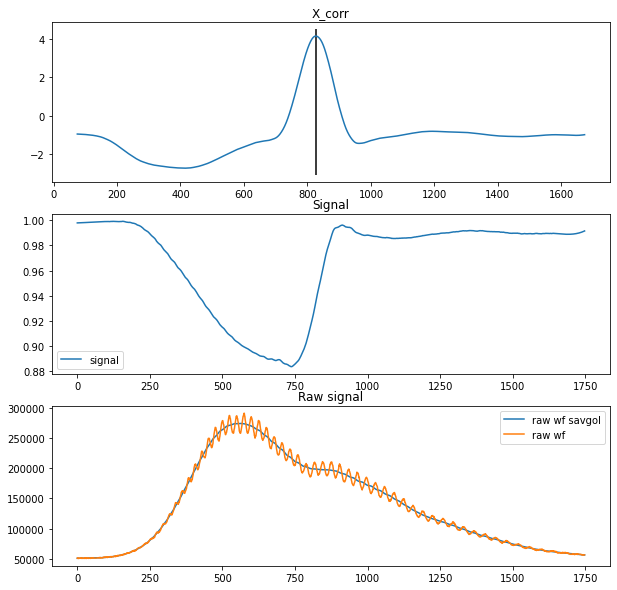

In [26]:
lags = np.arange(75,len(x_corr[0])+75)
ind = 20
plt.figure(figsize=[10,10])
plt.subplot(311)
plt.title('X_corr')
plt.plot(lags,x_corr[ind])
lims = plt.gca().get_ylim()
plt.vlines(edge_pos[ind], lims[0],lims[1])
plt.subplot(312)
plt.title('Signal')
plt.plot(signal[ind], label ='signal')
#plt.plot(avg_dark_wf[ind], label = 'avg_dark_wf')
plt.legend()
plt.subplot(313)
plt.title('Raw signal')
plt.plot(raw_wf_savgol[ind], label = 'raw wf savgol')
plt.plot(raw_wf[ind], label = 'raw wf')
plt.legend()

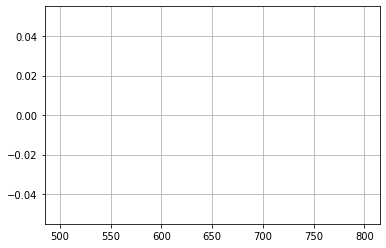

In [27]:
plt.figure()
plt.hist(edge_pos, bins = np.linspace(500, 800,100))
plt.grid()

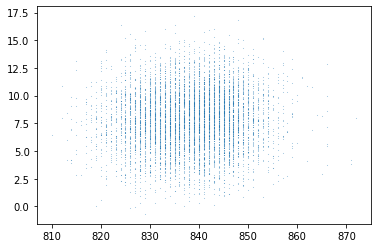

In [65]:
plt.figure()
plt.plot(edge_pos, x_corr_amp,'*', ms = 0.1)